# 데이터 불러오기부터

### 가. 라이브러리 Import

In [1]:
import pandas as pd
import numpy as np

#### [참고] AIDU에서 필요한 추가 라이브러리 Import : 아래 코드는 AIDU에서만 실행 가능합니다.

In [2]:
# from aicentro.session import Session
# from aicentro.framework.tensorflow import tensorflow as AiduFrm

### 나. 데이터 불러오기

In [3]:
df_feature = pd.read_csv("onenavi_train_feature.csv",sep="|")
df_target = pd.read_csv("onenavi_train_target.csv",sep="|")

#### [참고] AIDU에서는 파일을 불러올 때 아래 예시를 참고 : 아래 코드는 AIDU에서만 실행 가능합니다.

In [4]:
# # 데이터 셋 로딩
# aicentro_session = Session(verify = False)
# aidu_framework = AiduFrm(session = aicentro_session)
# df_feature = pd.read_csv(aidu_framework.config.data_dir+"onenavi_train_feature.csv",sep="|")
# df_target = pd.read_csv(aidu_framework.config.data_dir+"onenavi_train_target.csv",sep="|")
# df_feature # 데이터 프레임 확인하기

# 1. Train/Test Data Split
## Overfitting을 방지하기위해 우리는 데이터 셋을 분할합니다.
+ KeyPoint : 학습 대상으로 정제한 데이터를 Train/Test 데이터로 분할할 수 있다.

In [5]:
from sklearn.model_selection import train_test_split

# train_test_split : 테스트 데이터 20%
train_x, test_x, train_y, test_y = train_test_split(df_feature, df_target, test_size=0.20, random_state=42)

In [6]:
train_x

,A_DISTANCE,ETA,signaltype,WEEKDAY_0,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,HOUR_0,HOUR_1,...,level2_pnu_의정부시,level2_pnu_이천시,level2_pnu_종로구,level2_pnu_중구,level2_pnu_중랑구,level2_pnu_파주시,level2_pnu_평택시,level2_pnu_포천시,level2_pnu_하남시,level2_pnu_화성시
11541,0.476083,0.151320,0.018519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18534,0.468417,0.161868,0.138889,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27520,0.119750,0.100699,0.037037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
49897,0.722083,0.401491,0.453704,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27805,0.041417,0.121042,0.120370,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44732,0.460667,0.121867,0.212963,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54343,0.997500,0.242767,0.120370,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,0.721333,0.333049,0.083333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.183583,0.151612,0.092593,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[train_test_split Option 설명]
* test_size : 전체에서 test 데이터 비율을 주는 옵션입니다.(default 0.25)
* shuffle : 분할 이전에 섞을지 여부를 정해주는 옵션입니다.(default True)
* stratify : target으로 지정해주면 각 class 비율을 train/test에 적절하게 분배해줍니다. 즉, 쏠림 방지가 가능합니다.(default None)
* random_state : 분할하는 데이터를 섞을 때 기준(?)이 되어주는 값으로 모델 최적화(튜닝)를 할때는 이 값을 고정시켜 두어야 데이터셋이 변경되지 않아 정확한 비교가 가능합니다.

# 2. Modeling
## 이제 모델링을 해봅시다!
+ KeyPoint : 머신러닝 라이브러리를 토대로 모델링을 할 수 있다.

[공식 Document]
* sklearn(https://scikit-learn.org/stable/user_guide.html)
* sklearn.linear_model.LinearRegression(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
* sklearn.ensemble.RandomForestRegressor(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
* sklearn.ensemble.GradientBoostingRegressor(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor)
* xgboost(https://xgboost.readthedocs.io/en/latest/)

[여기서 짚고 넘어갈 것!]
* 모델의 평가 기준은 RMSE와 R-squared Score로 한다.(다른 평가 기준도 있으나, 본 실습에서는 두 가지로 진행)
* RMSE(Root Mean Squared Error) : 그대로 직역하면 Error(예측 값-실제 값) 제곱의 평균에 루트한 값으로 모델의 예측 값과 실제 값의 차이를 표현
* R-squared Score : 우리말로 결정계수라고 할 수 있는데, 모델의 설명력을 이야기해주는 지표이다.1에 가까울수록 모델의 설명력이 높다고 할 수 있음

### 가. LinearRegression 부터 시작해봅시다.
#### 통계와 기계학습에서 사용되는 전통적인 기법
#### 단순하게(조금은 거칠게) 표현하면  모델이 만들어낸 선형방정식과 실제 값의 오차를 기준으로 제일 작은 산식을 도출하는 방법이라고 할 수 있다.
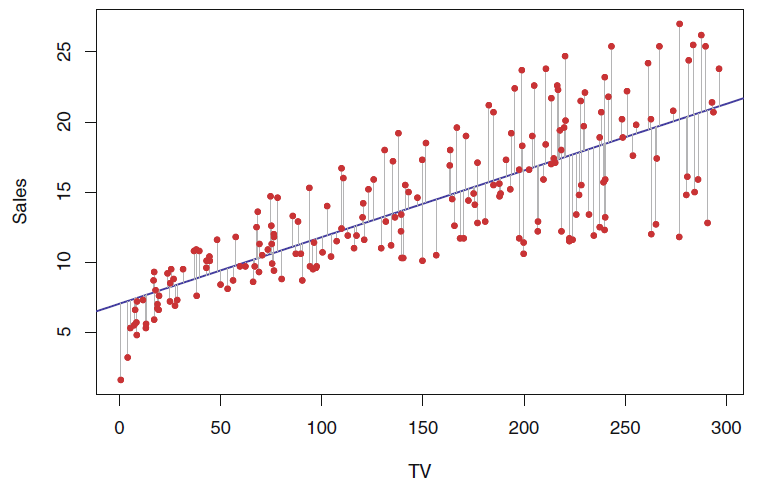

In [7]:
!pip install statsmodels

In [8]:
# 통계기법에서 LinearRegression
import statsmodels.api as sm

results = sm.OLS(train_y, train_x).fit()

results.summary()

# *** p<0.001, ** p<0.01, * p<0.05
# https://stats.stackovernet.xyz/ko/q/37406

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ET   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     1168.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:20:11   Log-Likelihood:            -3.1091e+05
No. Observations:               44346   AIC:                         6.220e+05
Df Residuals:                   44242   BIC:                         6.229e+05
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
A_DISTANCE             66.8325      7.085      9.433      0.000      52.946      80.719
ETA                  3975.5048     24.647    161.300      0.000    3927.197    4023.813
signaltype            216.6879     13.764     15.744      0.000     189.711     243.665
WEEKDAY_0              25.0780     11.253      2.229      0.026       3.022      47.134
WEEKDAY_1               8.8122     11.160      0.790      0.430     -13.062      30.686
WEEKDAY_2              45.9544     11.233      4.091      0.000      23.938      67.971
WEEKDAY_3              49.3716     11.030      4.476      0.000      27.752      70.991
WEEKDAY_4              10.0013     11.036      0.906      0.365     -11.629      31.632
HOUR_0                -58.8153     14.076     -4.178      0.000     -86.405     -31.225
HOUR_1                -55.8995     19.269     -2.901      0.004     -93.666     -18.133
HOUR_2                -41.9894     21.397     -1.962      0.050     -83.927      -0.052
HOUR_3                -79.7859     22.627     -3.526      0.000    -124.135     -35.437
HOUR_4                -37.5933     19.789     -1.900      0.057     -76.380       1.193
HOUR_5                -44.2222     11.564     -3.824      0.000     -66.888     -21.556
HOUR_6                  4.4395      7.711      0.576      0.565     -10.674      19.553
HOUR_7                103.5903      6.176     16.774      0.000      91.486     115.695
HOUR_8                 86.0005      5.848     14.706      0.000      74.539      97.462
HOUR_9                 68.1196      5.520     12.341      0.000      57.301      78.938
HOUR_10                31.6955      5.277      6.006      0.000      21.352      42.039
HOUR_11                16.8383      5.407      3.114      0.002       6.240      27.437
HOUR_12                 5.6680      6.171      0.919      0.358      -6.426      17.762
HOUR_13                31.8314      5.845      5.446      0.000      20.375      43.287
HOUR_14                36.6817      5.907      6.210      0.000      25.104      48.259
HOUR_15                49.8501      5.877      8.482      0.000      38.331      61.369
HOUR_16                69.4026      5.973     11.618      0.000      57.694      81.111
HOUR_17                88.5997      5.523     16.041      0.000      77.774      99.426
HOUR_18                95.7622      5.798     16.517      0.000      84.398     107.126
HOUR_19                -2.8595      6.375     -0.449      0.654     -15.354       9.635
HOUR_20               -40.4550      7.222     -5.602      0.000     -54.609     -26.301
HOUR_21               -43.7351      7.822     -5.591      0.000     -59.066     -28.404
HOUR_22               -67.7415      9.211     -7.355      0.000     -85.795     -49.688
HOUR_23               -76.1653     10.771     -7.071      0.000     -97.277     -55.053
lev

In [9]:
# 기계학습에서 LinearRegression
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

model=lr()
model.fit(train_x, train_y)

print("모델의 회귀계수는 : ", model.coef_, "이고 모델의 절편은 : ",model.intercept_)

pred_y = model.predict(test_x)
print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

모델의 회귀계수는 :  [[ 6.68342806e+01  3.97549726e+03  2.16689249e+02  2.14475155e+12
   2.14475155e+12  2.14475155e+12  2.14475155e+12  2.14475155e+12
  -8.31210421e+11 -8.31210421e+11 -8.31210421e+11 -8.31210421e+11
  -8.31210421e+11 -8.31210421e+11 -8.31210421e+11 -8.31210421e+11
  -8.31210421e+11 -8.31210421e+11 -8.31210421e+11 -8.31210421e+11
  -8.31210421e+11 -8.31210421e+11 -8.31210421e+11 -8.31210421e+11
  -8.31210421e+11 -8.31210421e+11 -8.31210421e+11 -8.31210421e+11
  -8.31210421e+11 -8.31210421e+11 -8.31210421e+11 -8.31210421e+11
   7.33670069e+12  8.03912251e+12  8.03912251e+12  2.74685012e+11
  -4.27736812e+11 -4.27736812e+11 -4.27736812e+11 -4.27736812e+11
  -4.27736812e+11  2.74685012e+11  2.74685012e+11  2.74685012e+11
   2.74685012e+11 -4.27736812e+11  2.74685012e+11  2.74685012e+11
  -4.27736812e+11 -4.27736812e+11  2.74685012e+11  2.74685012e+11
  -4.27736812e+11  2.74685012e+11 -4.27736812e+11  2.74685012e+11
  -4.27736812e+11 -4.27736812e+11 -4.27736812e+11  2.74685012e+

### 나. 다음은 앙상블 기법을 토대로 랜덤포레스트와 그라디언부스팅, XG부스팅을 활용해봅시다.

#### 본격적인 활용 이전에 앙상블 기법이 무엇인지 잠깐만 살펴보고 진행하겠습니다.
* 앙상블은 우리가 흔히 알고 있는 음악에서 사용되는 용어의 의미와 비슷하게 여러 모델을 이용해서 조화시키는 것으로 설명할 수 있습니다.
* 이를 통해 여러 모델의 장점을 모아 전반적인 오류를 줄여주고 각 모델의 한계를 극복할 수 있습니다.
* 앙상블은 크게 Bagging과 Boosting으로 구분해서 볼 수 있습니다.
* Bagging : Bootstrap Aggregating의 줄임말로 그대로 풀어보면 여러 개의 bootstrap을 생성하고 합쳐서(Aggregating) 최종 예측 모델을 산출하는 방법이다. 아래는 Bagging을 활용한 랜덤포레스트를 이해하기 쉽도록 도식화 한 것이다.
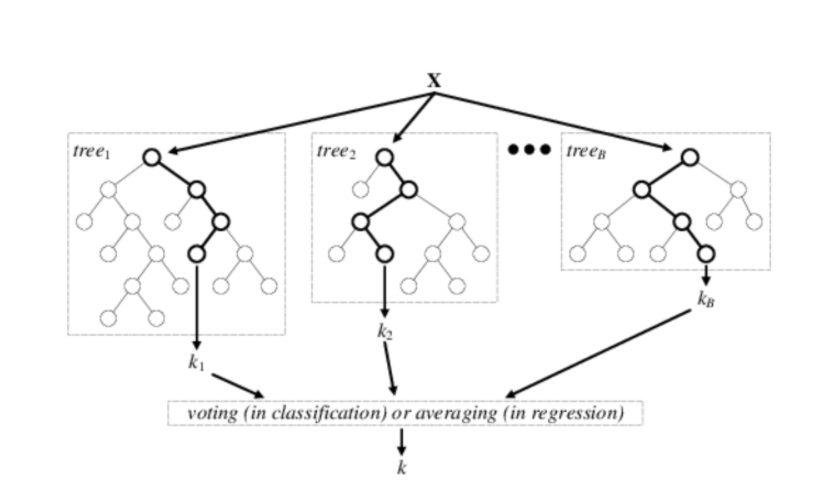
* Boosting : Bagging이 만든 여러 개의 bootstrap이 서로 영향을 주지 않는 병렬학습이라면 Boosting은 여러 모델을 순차적으로 학습해서 이전 모델의 결과를 바탕으로 다음 모델을 학습하는 기법이다. 이 과정을 통해 모델은 틀린 부분에 가중치를 부여하는 방식으로 오류를 더 잘 잡아낼 수 있도록 고안된 기법인데, Bagging과의 차이를 거칠게 표현하면 Bagging이 일반적인 모델을 여러개 생성하는데 집중한다면 Boosting은 정답을 찾기 어려운 문제에 집중한다고 할 수 있다. 아래는 부스팅을 이해하기 쉽게 도식화 한 것이다.
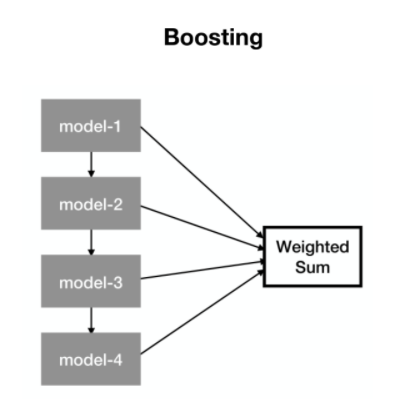

#### 1) 렌덤포레스트
##### 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법이라고 할 수 있다.

[주요 하이퍼 파라미터]
* n_estimators : 결정트리의 갯수를 지정하는 것인데, 많을 수록 좋은 결과 값을 기대할 수 있으나, 시간도 비례해서 증가할 수 있다는 것을 명심해야한다.(default 10)
* max_depth : 트리의 최대 깊이을 설정하는 것으로 많이 깊어질수록 과적합의 가능성이 높아진다.(default None)
* min_samples_split : 노드를 나눌 수 있는 최소 데이터 수(default 2)
* min_samples_leaf : 잎이 될 수 있는 최소 데이터 수(default 1)

In [10]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

# 다차원 배열을 1차원으로 평평하게 만들어주기!
train_y = np.ravel(train_y, order='C')

model=rfr(n_estimators=100,max_depth=5,min_samples_split=30,min_samples_leaf=15)
model.fit(train_x, train_y)

pred_y = model.predict(test_x)
print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

RMSE on Test set : 284.78082
R-squared Score on Test set : 0.69953


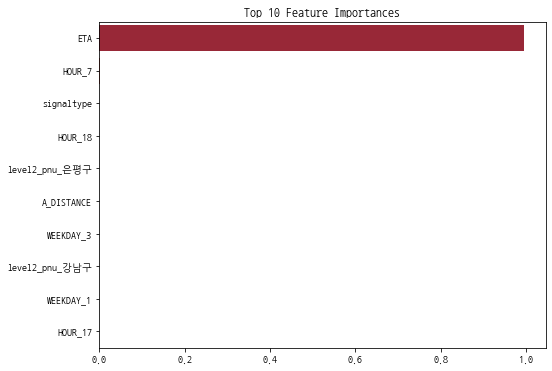

In [11]:
# Feature의 중요도 확인
import matplotlib.pyplot as plt
import seaborn as sns

rf_importances_values = model.feature_importances_
rf_importances = pd.Series(rf_importances_values, index = train_x.columns)
rf_top10 = rf_importances.sort_values(ascending=False)[:10]

plt.rcParams["font.family"] = 'NanumGothicCoding'
plt.figure(figsize=(8,6))
plt.title('Top 10 Feature Importances')
sns.barplot(x=rf_top10, y=rf_top10.index,palette = "RdBu")
plt.show()

#### 2) GradientBoosting
##### 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법
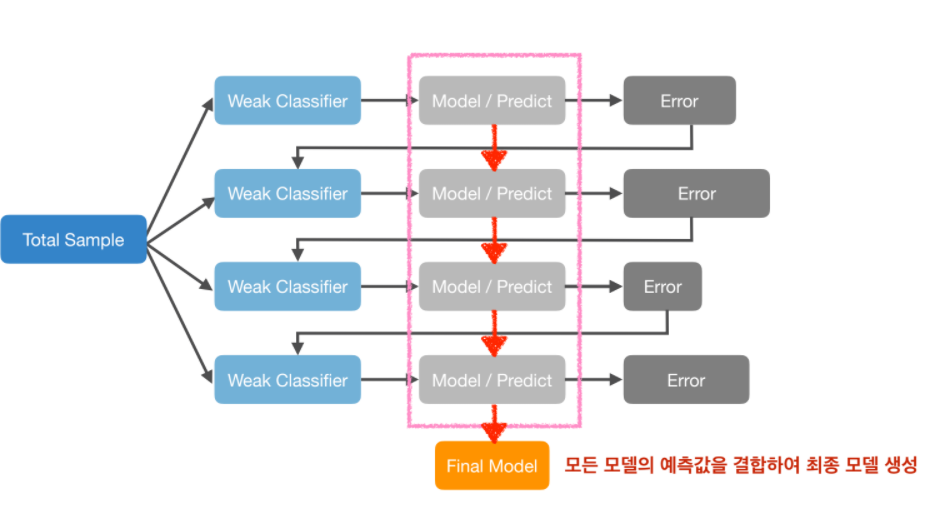

[주요 하이퍼 파라미터]
* loss : 경사하강법에서 사용할 손실함수를 지정(default ls(Least Square))
* learning_rate : 말그대로 학습율이다. 기존의 예측 값에 대해 학습 결과를 얼마나 업데이트(보정)할지 지정(default 0.1)
* n_estimators : 부스팅 단계의 갯수를 지정하는 것인데, 많을 수록 좋은 결과 값을 기대할 수 있으나, 시간도 비례해서 증가할 수 있다는 것을 명심해야한다.(default 10)
* max_depth : 트리의 최대 깊이을 설정하는 것으로 많이 깊어질수록 과적합의 가능성이 높아진다.(default None)
* min_samples_split : 노드를 나눌 수 있는 최소 데이터 수(default 2)
* min_samples_leaf : 잎이 될 수 있는 최소 데이터 수(default 1)

In [12]:
from sklearn.ensemble import GradientBoostingRegressor as grb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

# 다차원 배열을 1차원으로 평평하게 만들어주기!
train_y = np.ravel(train_y, order='C')

model=grb(n_estimators=100,learning_rate=0.1,max_depth=5,min_samples_split=30,min_samples_leaf=15)
model.fit(train_x, train_y)

pred_y = model.predict(test_x)
print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

RMSE on Test set : 276.47308
R-squared Score on Test set : 0.71681


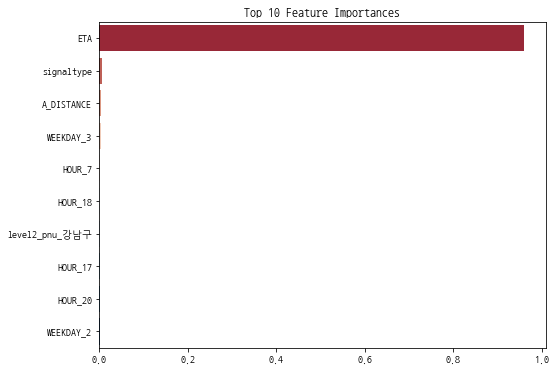

In [13]:
# Feature의 중요도 확인
import matplotlib.pyplot as plt
import seaborn as sns

grb_importances_values = model.feature_importances_
grb_importances = pd.Series(grb_importances_values, index = train_x.columns)
grb_top10 = grb_importances.sort_values(ascending=False)[:10]

plt.rcParams["font.family"] = 'NanumGothicCoding'
plt.figure(figsize=(8,6))
plt.title('Top 10 Feature Importances')
sns.barplot(x=grb_top10, y=grb_top10.index,palette = "RdBu")
plt.show()

#### 3) XGBoost
##### 부스팅 모델이 매우 강력한 것은 사실이지만 단점도 존재(느리고, 과적합의 이슈), 그래서 GradientBoosting보다 빠르고 규제를 설정해서 과적합 방지가 가능한 XGBoost가 등장


[주요 하이퍼 파라미터]
* booster : 사용할 부스터(default gbtree)
* gamma : 가지를 칠 때 필요한 최소손실 감소로 클수록 보수적(가지를 치지 않는다)이라고 할 수 있다.(default 0)
* eta : 말그대로 학습율이다. 기존의 예측 값에 대해 학습 결과를 얼마나 업데이트(보정)할지 지정(default 0.3)
* n_estimators : 부스팅 단계의 갯수를 지정하는 것인데, 많을 수록 좋은 결과 값을 기대할 수 있으나, 시간도 비례해서 증가할 수 있다는 것을 명심해야한다.(default 100)
* max_depth : 트리의 최대 깊이을 설정하는 것으로 많이 깊어질수록 과적합의 가능성이 높아진다.(default 6)
* reg_lambda : 가중치에 대한 L2 정규화(default 1), 커질수록 오버피팅 방지, 너무 큰 가중치를 줄여줄 수 있음
* reg_alpha : 가중치에 대한 L1 정규화(default 0), 커질수록 오버피팅 방지, 불필요한 가중치를 0으로 만들어서 무시
* [참고] https://developers.google.com/machine-learning/crash-course/regularization-for-sparsity/l1-regularization?hl=ko
* early_stopping_rounds : 조기 종료 옵션, 지정 횟수 동안 결과가 개선 되지 않으면 조기 종료 한다.

In [14]:
from xgboost import XGBRegressor as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

# 다차원 배열을 1차원으로 평평하게 만들어주기!
train_y = np.ravel(train_y, order='C')

model=xgb(n_estimators=100,gamma=1,eta=0.1,max_depth=5,reg_lambda=5,reg_alpha=5)
model.fit(train_x, train_y)

pred_y = model.predict(test_x)
print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

[16:20:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE on Test set : 276.54654
R-squared Score on Test set : 0.71666


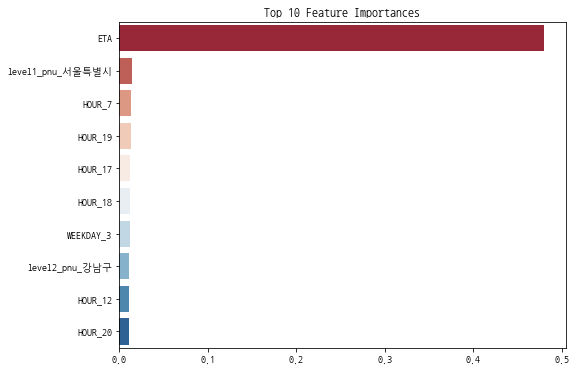

In [15]:
# Feature의 중요도 확인
import matplotlib.pyplot as plt
import seaborn as sns

xgb_importances_values = model.feature_importances_
xgb_importances = pd.Series(xgb_importances_values, index = train_x.columns)
xgb_top10 = xgb_importances.sort_values(ascending=False)[:10]

plt.rcParams["font.family"] = 'NanumGothicCoding'
plt.figure(figsize=(8,6))
plt.title('Top 10 Feature Importances')
sns.barplot(x=xgb_top10, y=xgb_top10.index,palette = "RdBu")
plt.show()

### 다. 그럼 여러 개의 모델을 한 번에 확인해볼까요?

In [16]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import GradientBoostingRegressor as grb
from xgboost import XGBRegressor as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

import pickle
import joblib
import time

model_list=[
            lr(),
            rfr(),
            grb(),
            xgb()
            ]

# 다차원 배열을 1차원으로 평평하게 만들어주기!
train_y = np.ravel(train_y, order='C')

model_rslt = []
for i in range(len(model_list)):
    start_time = time.process_time()
    model = model_list[i]
    model.fit(train_x, train_y)
    end_time = time.process_time()
    joblib.dump(model, '{}_model.pkl'.format(i)) # 모델 저장, sklearn을 통해서 만들어진 모델은 pkl 파일로 저장
    print(f"* {model} 결과 시작")
    print('----  {0:.5f}sec, training complete  ----'.format(end_time-start_time))
    pred_y = model.predict(test_x)
    model_rslt.append(model)
    print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
    print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))
    print("---------------------------------------------------------------------------")

* LinearRegression() 결과 시작
----  4.21469sec, training complete  ----
RMSE on Test set : 279.38720
R-squared Score on Test set : 0.71081
---------------------------------------------------------------------------
* RandomForestRegressor() 결과 시작
----  44.43437sec, training complete  ----
RMSE on Test set : 285.12278
R-squared Score on Test set : 0.69881
---------------------------------------------------------------------------
* GradientBoostingRegressor() 결과 시작
----  7.26729sec, training complete  ----
RMSE on Test set : 279.06277
R-squared Score on Test set : 0.71148
---------------------------------------------------------------------------
[16:21:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
* XGBRegressor() 결과 시작
----  7.91140sec, training complete  ----
RMSE on Test set : 279.15119
R-squared Score on Test set : 0.71129
---------------------------------------------------------------------------
